# EDA Project





# LiChess Data Analysis 







# 

# 

#        First: Data preparation & cleaning


In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
#read a comma separated values (csv) file into dataFrame
ch=pd.read_csv("games.csv")

In [50]:
#return a tuple representing the dimensionality of the ch dataframe
ch.shape

(20058, 16)

In [51]:
# a concise summary of a ch
ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [52]:
#Generate descriptive statistics
ch.describe

<bound method NDFrame.describe of              id  rated    created_at  last_move_at  turns victory_status  \
0      TZJHLljE  False  1.504210e+12  1.504210e+12     13      outoftime   
1      l1NXvwaE   True  1.504130e+12  1.504130e+12     16         resign   
2      mIICvQHh   True  1.504130e+12  1.504130e+12     61           mate   
3      kWKvrqYL   True  1.504110e+12  1.504110e+12     61           mate   
4      9tXo1AUZ   True  1.504030e+12  1.504030e+12     95           mate   
...         ...    ...           ...           ...    ...            ...   
20053  EfqH7VVH   True  1.499791e+12  1.499791e+12     24         resign   
20054  WSJDhbPl   True  1.499698e+12  1.499699e+12     82           mate   
20055  yrAas0Kj   True  1.499698e+12  1.499698e+12     35           mate   
20056  b0v4tRyF   True  1.499696e+12  1.499697e+12    109         resign   
20057  N8G2JHGG   True  1.499643e+12  1.499644e+12     78           mate   

      winner increment_code       white_id  white_rat

In [53]:
#data type of each column
ch.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

In [54]:
#detect missing values
ch.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [55]:
#drop specified labels from rows or columns
ch.drop(columns = ['moves','last_move_at','created_at'],inplace=True)

# 

# Second: Exploratory analysis & visualization

# 

# Question 1: Which is the most played chess opening?

In [56]:
#group dataFrame using a mapper
popularopening = ch.groupby('opening_name')[['id']].count()

In [57]:
popularopening = popularopening.sort_values('id',ascending = False).reset_index() #sort by values along either axis
popularopening.rename(columns={'id':'Total','opening_name':'Opening Observed'},inplace=True) #rename columns

In [58]:
#to check the first 10 rows after edits
popularopening.head(10)

,Opening Observed,Total
0,Van't Kruijs Opening,368
1,Sicilian Defense,358
2,Sicilian Defense: Bowdler Attack,296
3,Scotch Game,271
4,French Defense: Knight Variation,271
5,Scandinavian Defense: Mieses-Kotroc Variation,259
6,Queen's Pawn Game: Mason Attack,232
7,Queen's Pawn Game: Chigorin Variation,229
8,Scandinavian Defense,223
9,Horwitz Defense,209


In [59]:
labels=list(popularopening['Opening Observed'])
len(labels) #calculate the length of labels

1477

In [60]:
#purely int-loc based indexing for selection by position
popularopening = popularopening.iloc[0:10, :]
popularopening

,Opening Observed,Total
0,Van't Kruijs Opening,368
1,Sicilian Defense,358
2,Sicilian Defense: Bowdler Attack,296
3,Scotch Game,271
4,French Defense: Knight Variation,271
5,Scandinavian Defense: Mieses-Kotroc Variation,259
6,Queen's Pawn Game: Mason Attack,232
7,Queen's Pawn Game: Chigorin Variation,229
8,Scandinavian Defense,223
9,Horwitz Defense,209


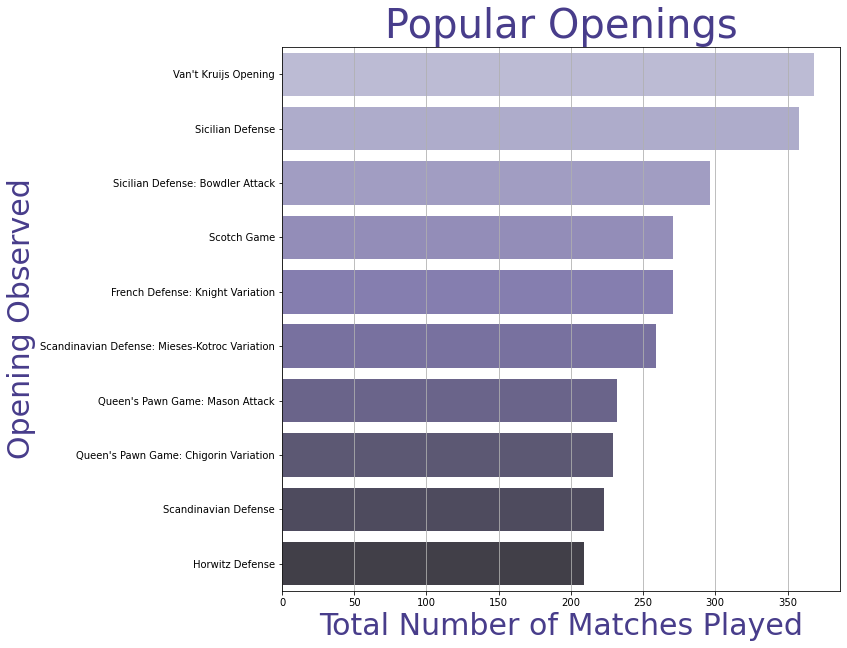

In [79]:
plt.figure(figsize=(10,10))
plt.grid()
plt.title('Popular Openings',fontsize=40,color="darkslateblue") #title of the visualization
barplot = sns.barplot(x='Total',y='Opening Observed',data=popularopening, palette="Purples_d");
barplot.set_xlabel("Total Number of Matches Played", fontsize = 30, color="darkslateblue"); #title of the x label
barplot.set_ylabel("Opening Observed", fontsize = 30,color="darkslateblue"); #title of the y label